In [ ]:
import pandas as pd                         # data manipulation
import numpy as np                          # numerical operations
import matplotlib.pyplot as plt             # basic plotting
import seaborn as sns                       # statistical vizualisation
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

sns.set(color_codes=True) # allows for use of shorthand color codes

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Specify the folder you want to access
project_folder = "/content/drive/My Drive/CS463/KelpEDA"

Mounted at /content/drive


In [ ]:
file_path = os.path.join(project_folder, "Urchin_ALAN_Long_Format.csv")

df = pd.read_csv(file_path)

In [ ]:
print(df.describe())
df.info()

       Hobo.Logger.Serial  Total.Weight  Test.Diameter..mm.  Gonad.Weight  \
count        1.950000e+02    280.000000          280.000000    280.000000   
mean         1.660632e+07    297.348214           78.168214     16.419643   
std          5.084101e+06    108.932100           10.937255     11.024661   
min          2.006895e+06    111.300000           55.340000      0.300000   
25%          1.050546e+07    220.325000           72.422500      6.900000   
50%          2.005614e+07    308.350000           78.960000     16.650000   
75%          2.006130e+07    373.050000           85.282500     24.600000   
max          2.028446e+07    611.300000          106.010000     48.500000   

       Gonad.Index....        Week  Consumption  ConsumptionbyWeight  
count       280.000000  280.000000   280.000000           280.000000  
mean          5.269851    4.800000     2.470214             0.008687  
std           2.637392    2.998685     1.677419             0.005632  
min           0.253378

In [ ]:
# ALAN = 0, Dark = 1
df['Light'] = df['Light'].astype('category')
df['Light_encoded'] = df['Light'].cat.codes
# Ambient = 0, Warm = 1
df['Temp'] = df['Temp'].astype('category')
df['Temp_encoded'] = df['Temp'].cat.codes
# Normal = 0, Treated = 1
df['Kelp'] = df['Kelp'].astype('category')
df['Kelp_encoded'] = df['Kelp'].cat.codes

In [ ]:
print(df.describe())
df.info()

       Hobo.Logger.Serial  Total.Weight  Test.Diameter..mm.  Gonad.Weight  \
count        1.950000e+02    280.000000          280.000000    280.000000   
mean         1.660632e+07    297.348214           78.168214     16.419643   
std          5.084101e+06    108.932100           10.937255     11.024661   
min          2.006895e+06    111.300000           55.340000      0.300000   
25%          1.050546e+07    220.325000           72.422500      6.900000   
50%          2.005614e+07    308.350000           78.960000     16.650000   
75%          2.006130e+07    373.050000           85.282500     24.600000   
max          2.028446e+07    611.300000          106.010000     48.500000   

       Gonad.Index....        Week  Consumption  ConsumptionbyWeight  \
count       280.000000  280.000000   280.000000           280.000000   
mean          5.269851    4.800000     2.470214             0.008687   
std           2.637392    2.998685     1.677419             0.005632   
min           0.25

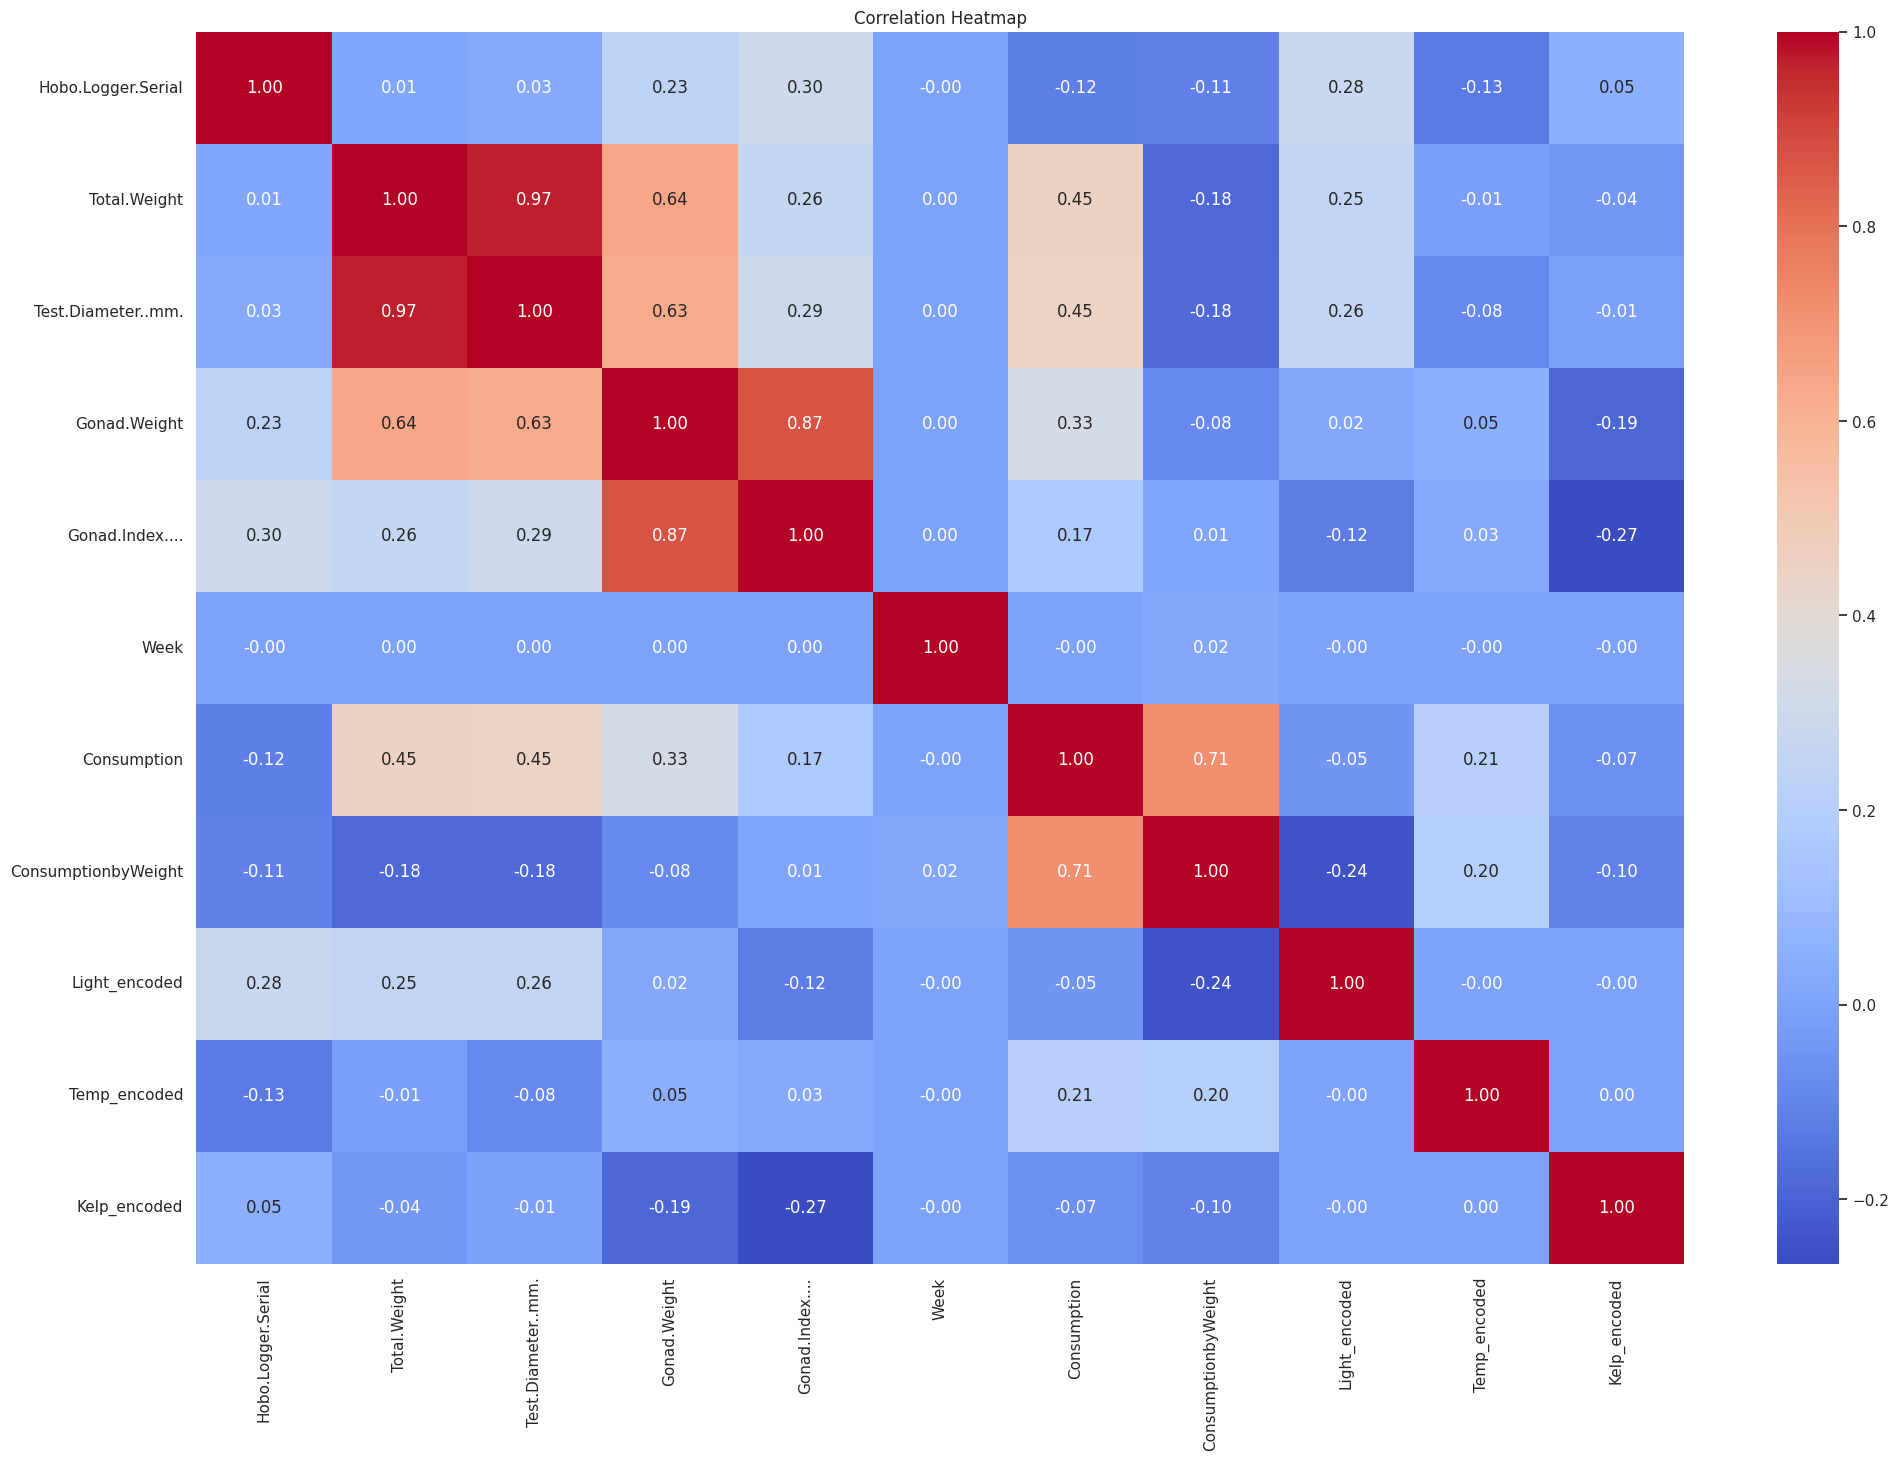

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_cols]

# Calculate Pearson correlation coefficient between all paris of columns in df
correlation_matrix = numerical_df.corr()

# Heatmap visualization
plt.figure(figsize=(24, 16))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1500x1000 with 0 Axes>

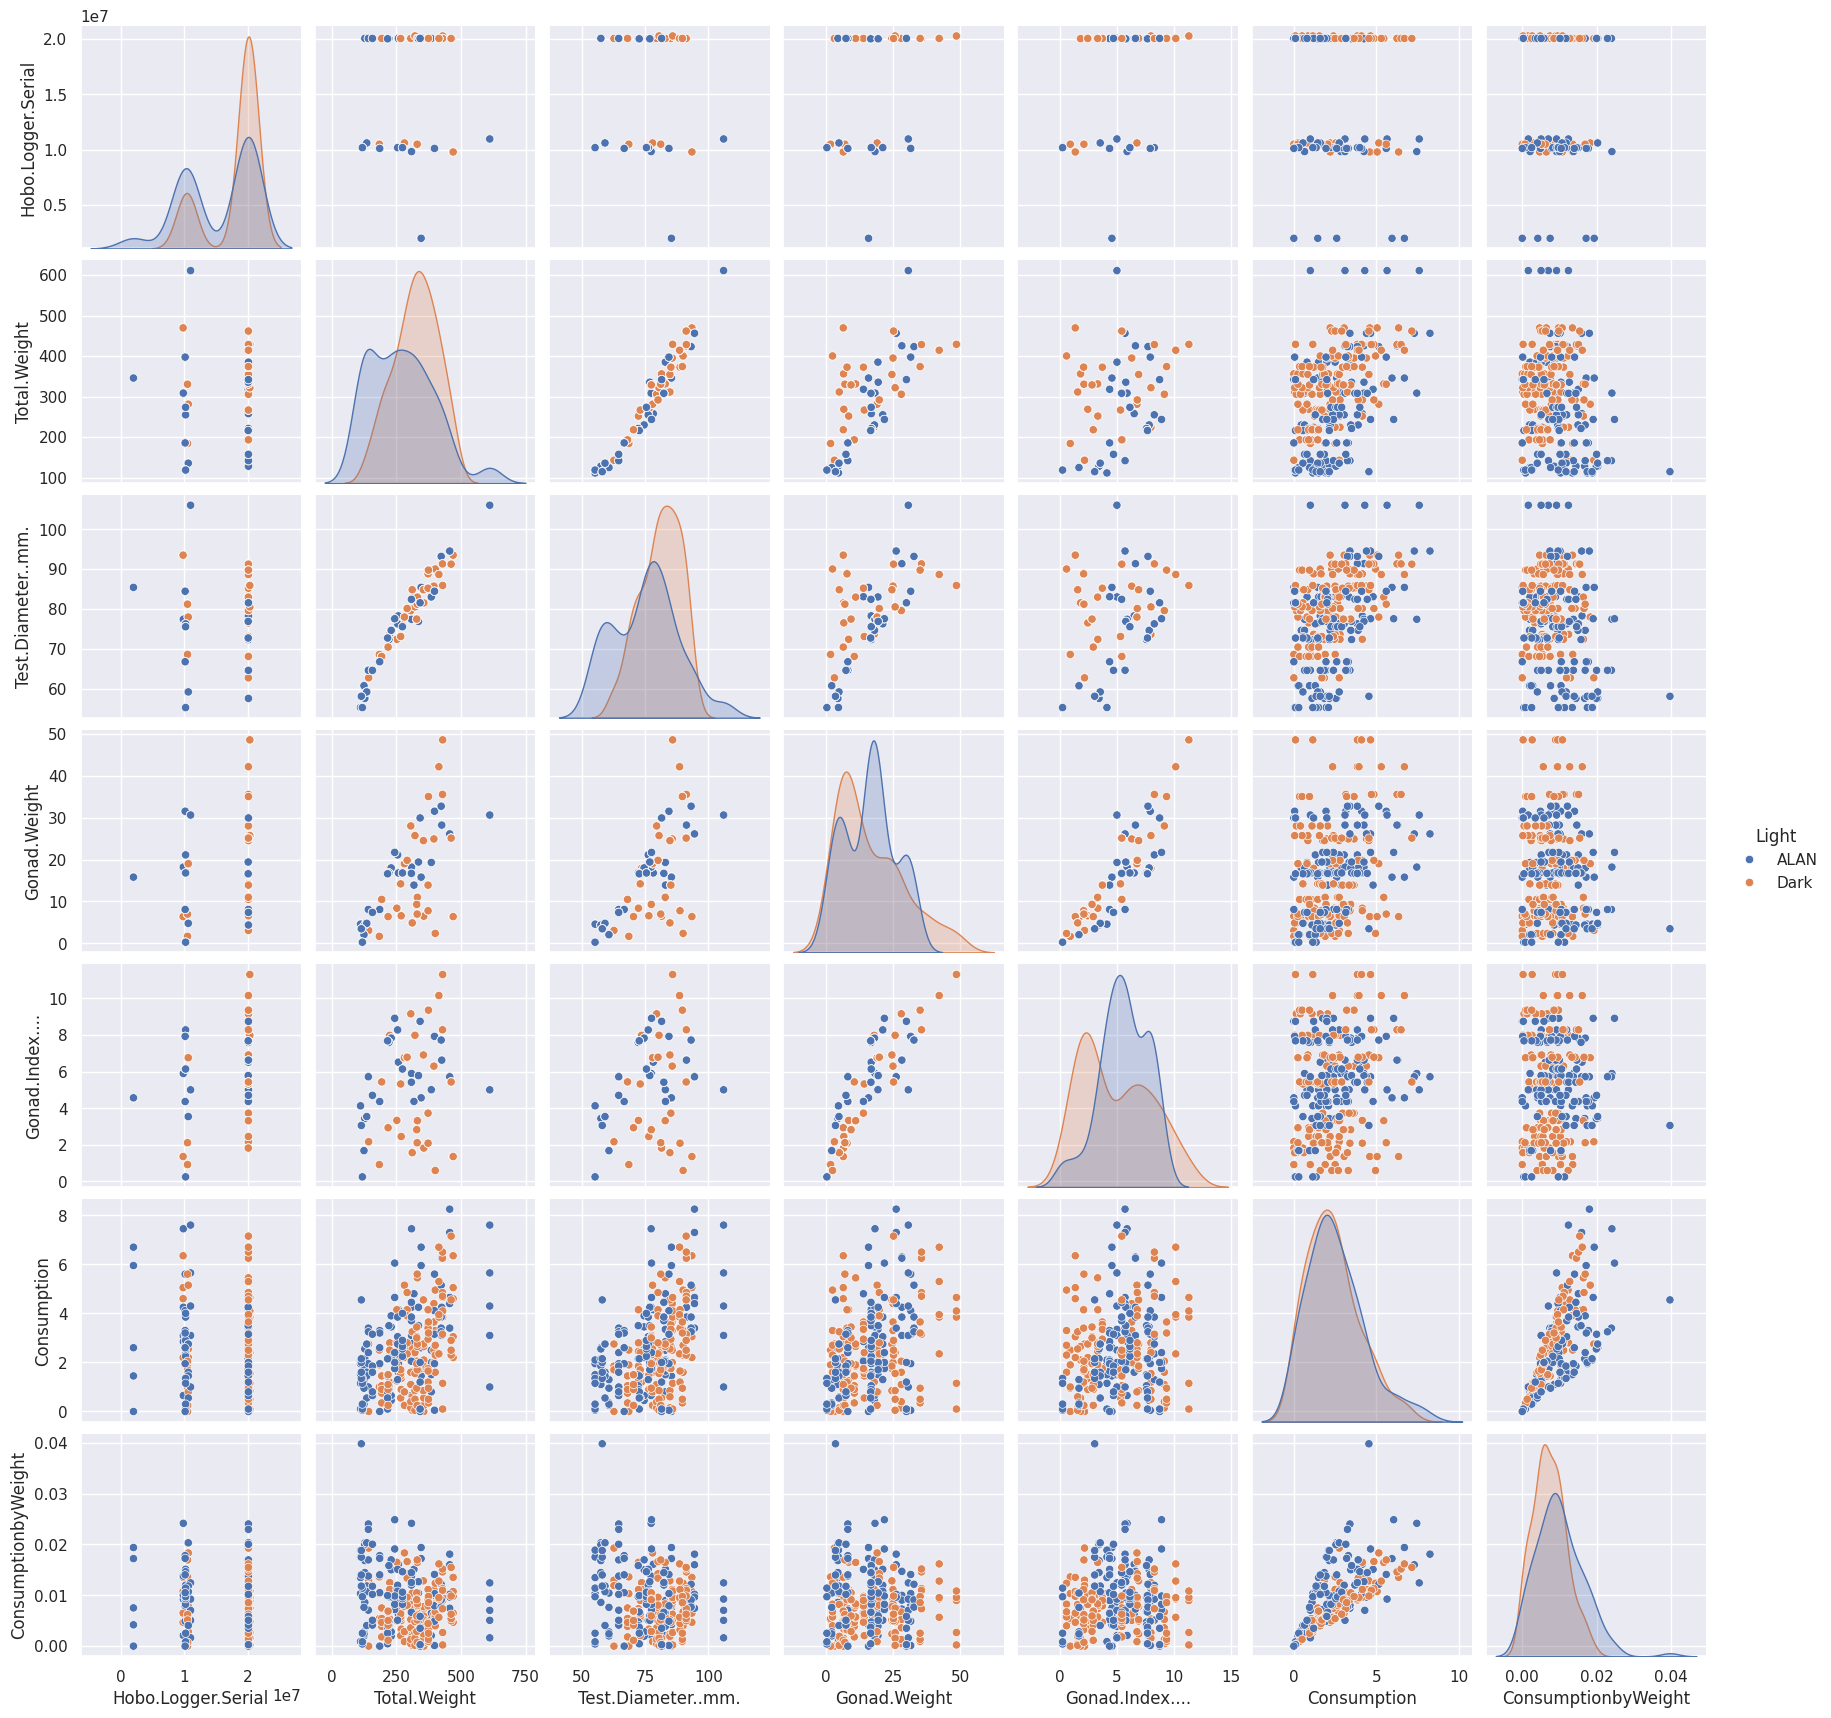

In [ ]:
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='Light', vars=['Hobo.Logger.Serial', 'Total.Weight','Test.Diameter..mm.','Gonad.Weight','Gonad.Index....','Consumption','ConsumptionbyWeight'])
plt.show()

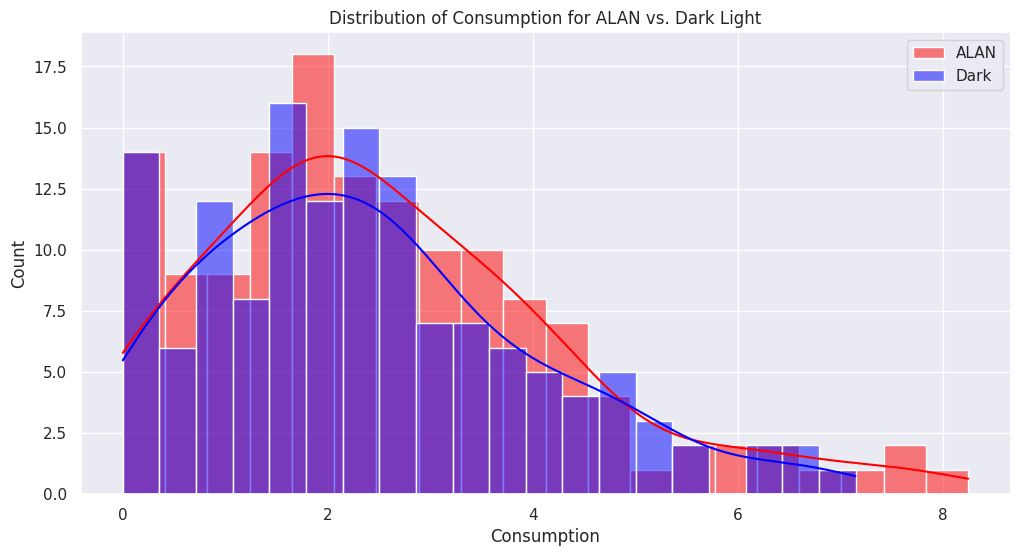

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Light_encoded'] == 0]['Consumption'], bins=20, kde=True, label='ALAN', color='red', alpha=0.5)
sns.histplot(df[df['Light_encoded'] == 1]['Consumption'], bins=20, kde=True, label='Dark', color='blue', alpha=0.5)
plt.xlabel("Consumption")
plt.ylabel("Count")
plt.title("Distribution of Consumption for ALAN vs. Dark Light")
plt.legend()
plt.grid(True)
plt.show()

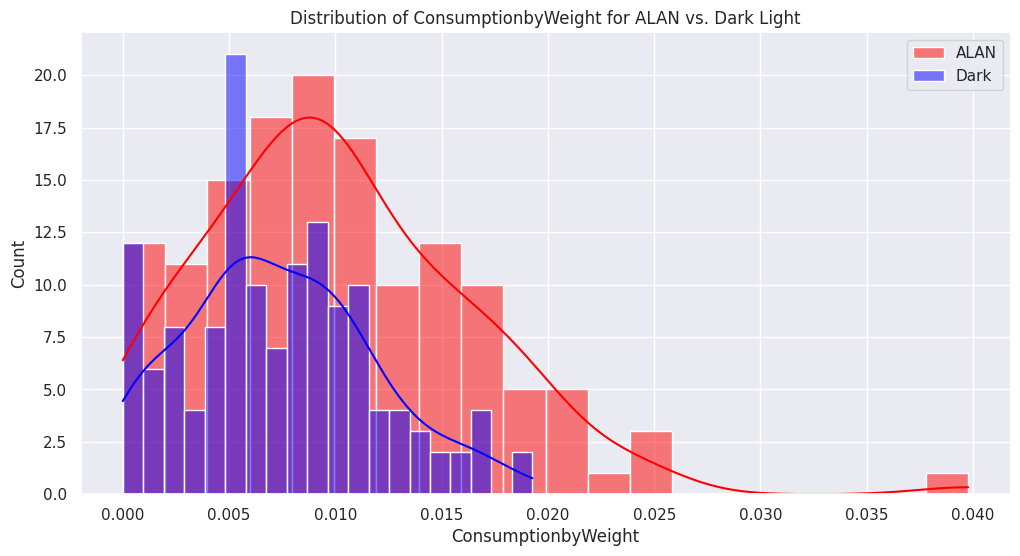

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Light_encoded'] == 0]['ConsumptionbyWeight'], bins=20, kde=True, label='ALAN', color='red', alpha=0.5)
sns.histplot(df[df['Light_encoded'] == 1]['ConsumptionbyWeight'], bins=20, kde=True, label='Dark', color='blue', alpha=0.5)
plt.xlabel("ConsumptionbyWeight")
plt.ylabel("Count")
plt.title("Distribution of ConsumptionbyWeight for ALAN vs. Dark Light")
plt.legend()
plt.grid(True)
plt.show()

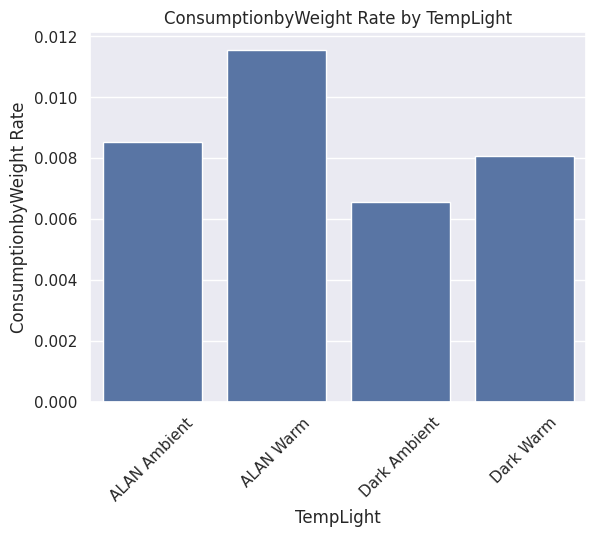

In [ ]:
sns.barplot(x=df['TempLight'], y=df['ConsumptionbyWeight'], errorbar=None, order=sorted(df['TempLight'].unique()))
plt.xticks(rotation=45)
plt.title("ConsumptionbyWeight Rate by TempLight")
plt.xlabel("TempLight")
plt.ylabel("ConsumptionbyWeight Rate")
plt.show()

# Linear Regression

In [ ]:
X = df[['Light_encoded']]
y = df['ConsumptionbyWeight']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test data
y_pred = lin_reg.predict(X_test)

# Compute R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Simple Linear Regression R²: {r2:.4f}')
print(f'Simple Linear Regression RMSE: {rmse:.2f}')

Simple Linear Regression R²: -0.0231
Simple Linear Regression RMSE: 0.01


In [ ]:
X = df[['Temp_encoded']]
y = df['ConsumptionbyWeight']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test data
y_pred = lin_reg.predict(X_test)

# Compute R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Simple Linear Regression R²: {r2:.4f}')
print(f'Simple Linear Regression RMSE: {rmse:.2f}')

Simple Linear Regression R²: 0.0639
Simple Linear Regression RMSE: 0.01


In [ ]:
X = df[['Light_encoded']]
y = df['Consumption']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test data
y_pred = lin_reg.predict(X_test)

# Compute R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Simple Linear Regression R²: {r2:.4f}')
print(f'Simple Linear Regression RMSE: {rmse:.2f}')

Simple Linear Regression R²: -0.0284
Simple Linear Regression RMSE: 1.56


In [ ]:
X = df[['Temp_encoded']]
y = df['Consumption']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test data
y_pred = lin_reg.predict(X_test)

# Compute R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Simple Linear Regression R²: {r2:.4f}')
print(f'Simple Linear Regression RMSE: {rmse:.2f}')

Simple Linear Regression R²: 0.0543
Simple Linear Regression RMSE: 1.50


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
alphas = np.logspace(-3, 3, 50)

# Perform Grid Search to find the best alpha (λ) for Ridge Regression
# GridSearchCV tests different alpha values using 5-fold cross-validation (cv=5)
# It evaluates models using negative mean squared error (scoring='neg_mean_squared_error')
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

# Fit Ridge model on the training data using cross-validation to find best alpha
ridge_cv.fit(X_train_scaled, y_train)

# Print the best alpha (λ) value found by cross-validation
print(f"### Ridge Regression")
print(f"Best Ridge Alpha: {ridge_cv.best_params_['alpha']}")

# Train the final Ridge model using the best alpha found by GridSearchCV
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'])

# Fit the Ridge model using standardized training data
ridge_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_best.predict(X_test_scaled)

# Calculate Root Mean Squared Error (RMSE) to evaluate model performance
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2 = r2_score(y_test, y_pred_ridge)

# Print the RMSE for Ridge Regression
print(f"Ridge Regression R²: {r2:.4f}")
print(f"Ridge Regression RMSE: {rmse_ridge:.4f}")

### Ridge Regression
Best Ridge Alpha: 44.98432668969444
Ridge Regression R²: 0.0447
Ridge Regression RMSE: 1.5030


In [ ]:
# Perform Grid Search to find the best alpha (λ) for Lasso Regression
# Lasso can take longer to converge, so we set max_iter=10000 to ensure stability
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

# Fit Lasso model on the training data using cross-validation to find best alpha
lasso_cv.fit(X_train_scaled, y_train)

# Print the best alpha (λ) value found by cross-validation
print(f"### Lasso Regression")
print(f"Best Lasso Alpha: {lasso_cv.best_params_['alpha']}")

# Train the final Lasso model using the best alpha found by GridSearchCV
lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha'], max_iter=10000)

# Fit the Lasso model using standardized training data
lasso_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_best.predict(X_test_scaled)

# Calculate Root Mean Squared Error (RMSE) to evaluate model performance
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Print the RMSE for Lasso Regression
r2 = r2_score(y_test, y_pred_lasso)

# Print the RMSE for Ridge Regression
print(f"Lasso Regression R²: {r2:.4f}")
print(f"Lasso Regression RMSE: {rmse_lasso:.4f}")

### Lasso Regression
Best Lasso Alpha: 0.001
Lasso Regression R²: 0.0541
Lasso Regression RMSE: 1.4956


In [ ]:
print(df.describe())
df.info()

       Hobo.Logger.Serial  Total.Weight  Test.Diameter..mm.  Gonad.Weight  \
count        1.950000e+02    280.000000          280.000000    280.000000   
mean         1.660632e+07    297.348214           78.168214     16.419643   
std          5.084101e+06    108.932100           10.937255     11.024661   
min          2.006895e+06    111.300000           55.340000      0.300000   
25%          1.050546e+07    220.325000           72.422500      6.900000   
50%          2.005614e+07    308.350000           78.960000     16.650000   
75%          2.006130e+07    373.050000           85.282500     24.600000   
max          2.028446e+07    611.300000          106.010000     48.500000   

       Gonad.Index....        Week  Consumption  ConsumptionbyWeight  \
count       280.000000  280.000000   280.000000           280.000000   
mean          5.269851    4.800000     2.470214             0.008687   
std           2.637392    2.998685     1.677419             0.005632   
min           0.25

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score


print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

MSE: 5.045627448599378e-07
R^2 Score: 0.9825923025716627
Consumption           0.681664
Total.Weight          0.175586
Test.Diameter..mm.    0.114951
Gonad.Index....       0.008831
Week                  0.006925
Gonad.Weight          0.006023
Hobo.Logger.Serial    0.006021
dtype: float64


<ipython-input-25-a4ab5007dba5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")


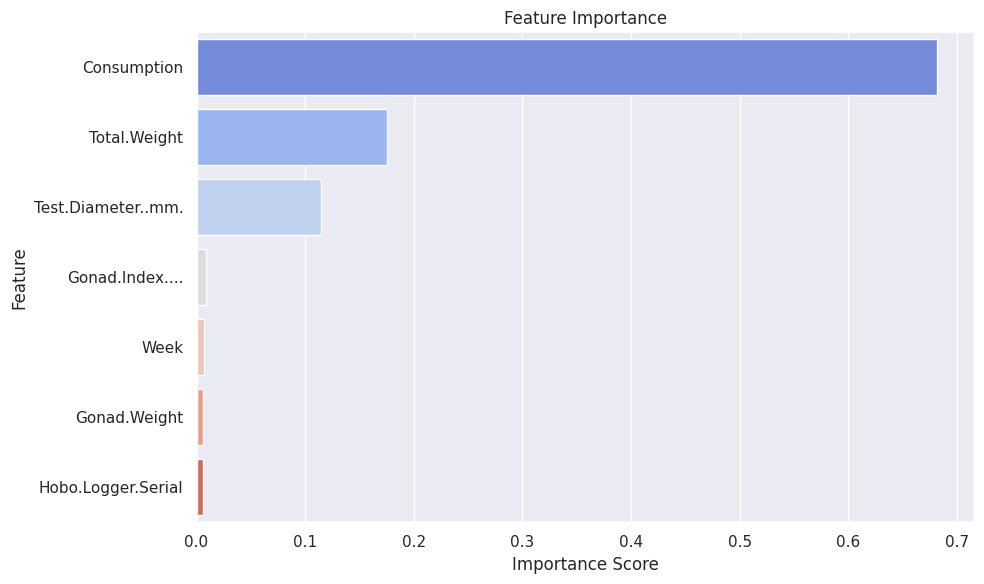

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()